# K-Means Clustering Algorithm
## Changelog :
v0.0.1-beta0:
- simple k-means clustering algorithm created
- randomize the centroid again when first iteration the centroid is outside the range of the data point
## Future Changelog:
- Centroid is robust and location not changed every fitting run


In [91]:
"""
Tugas TKPP - Implementasi Algoritma K-Means Clustering v0.0.1-beta0
Author  : M. Rizqi S.
NIM     : 22/495313/PTK/14431
"""
import numpy as np
from numpy.random import uniform
import pandas as pd
import matplotlib.pyplot as plt

## Input data w/o knowing classes

In [92]:
data = np.array([[0.36, 0.47], [0.36, 0.57], [0.15, 0.57], [0.10, 0.78],
                 [0.21, 0.83], [0.41, 0.10], [0.62, 0.05], [0.67, 0.15],
                 [0.93, 0.01], [0.93, 0.05], [0.99, 0.21], [0.57, 0.05],
                 [0.83, 0.83], [0.73, 0.93], [0.57, 0.57], [0.99, 0.57]])

B'cause k-means clustering is distance based, so we need calculate distance between centroid and dataset input. I use euclidean distance algorithm to calculate distance :
$$ED(A,B) = \sqrt{\sum_{k=1}^N(a_k-b_k)^2}$$

In [93]:
def euclidean(centroid, x):
    """
    Euclidean distance between centroid & x point.
    """
    return np.sqrt(np.sum((x - centroid)**2, axis=1))  

## Class function of K-Means Clustering Algorithms

In [94]:
class KMeans():
    # set default initialization for number of cluster 3 and max iteration is 100
    def __init__(self, n_cluster=3, max_iter=100):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.sorted_points = [[] for _ in range(self.n_cluster)]
    
    def init_random_centroids(self, data):
        #randomly selected centroid start points,
        #on range minimum and maximum data points.
        x1 = data[:,0]
        x2 = data[:,1]  
        x1_min, x1_max = np.min(x1), np.max(x1)
        x2_min, x2_max = np.min(x2), np.max(x2)
        self.centroids = np.array([[uniform(x1_min,x1_max), uniform(x2_min,x2_max)]
                         for _ in range(self.n_cluster)])

    def sorted_point_data(self, data):
        #sorting data points which nearest from centroid
        for x in data:
            distance = euclidean(self.centroids, x)
            centroid_idx = np.argmin(distance)
            self.sorted_points[centroid_idx].append(x)

    #fitting the model 
    def fit(self, data):
        #initializing random centroid
        self.init_random_centroids(data)

        #perform iteration to optimizing the centroid location
        iteration = 0
        prev_centroids = None
        # looping until every centroid has same position with previous calculation centroid 
        # and number of iterations less than maximum iteration (self.max_iter)
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each data point, assigning to nearest centroid
            self.sorted_points = [[] for _ in range(self.n_cluster)]
            self.sorted_point_data(data)

            # randomize centroid again when first iteration have zero point array on sorted_points list
            # because initialization centroid must have at least one point array on sorted_points list
            if iteration == 0:
                change_centroid = False
                for point in self.sorted_points:
                    if (len(point)==0):
                        change_centroid = True
                        break
                if (change_centroid):
                    self.init_random_centroids(data)
                    self.sorted_point_data(data)

            # Push current centroids to previous, 
            # reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = np.array([np.mean(cluster, axis=0) for cluster in self.sorted_points])
            # enumerate give 2 variable :
            # the count of current iteration
            # the value of the item in current iteration
            for i, centroid in enumerate(self.centroids):
                # Catch any np.nans, resulting from a centroid having no points
                if np.isnan(centroid).any():  
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

        print("fitting finish at iteration {}".format(iteration))

    def get_centroid(self):
        return self.centroids

In [95]:
k_means = KMeans(n_cluster=3, max_iter=10)
k_means.fit(data)

centroid = k_means.get_centroid()

fitting finish at iteration 2


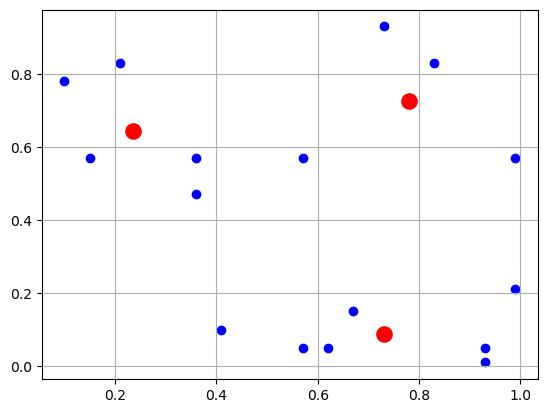

In [96]:
x1 = data[:,0]
x2 = data[:,1]
x1_centroid = centroid[:,0]
x2_centroid = centroid[:,1]

plt.scatter(x1,x2,color="blue")
plt.scatter(x1_centroid, x2_centroid,color="red", s=120)
plt.grid(True)
plt.show()